# Logging Python Usage
## Python versions usage over time and lists of users by Python version

This notebook presents how Python usage by version varies over time, at a daily resolution. It also presents ordered lists of which users are using which major versions of Python

## Contents - plots and listings

 - [Daily Python invocations over time - minor versions (Plot)](#Daily-Python-invocations-over-time---minor-versions)
 - [Daily Python invocations over time - minor versions - log scale (Plot)](#Daily-Python-invocations-over-time---minor-versions---log-scale)
 - [Daily Python invocations over time - major versions (Plot)](#Daily-Python-invocations-over-time---major-versions)
 - [Daily Python invocations over time - major versions - log scale (Plot)](#Daily-Python-invocations-over-time---major-versions---log-scale)
 - [Top users of Python 2.x (List)](#top-py2-users)
 - [Top users of Python 3.x (List)](#top-py3-users)
 - [ALL users of Python 2.x (List)](#all-py2-users)
 - [ALL users of Python 3.x (List)](#all-py3-users)

## Setup

Let's get together all the imports that we'll need.

In [1]:
import glob
import os
import heapq
import re
import datetime

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 16)

## Load data

Each month a text file, called `daily_usage.txt`, has daily usage of Python by version appended to it. By loading this file and plotting it we can observe the trend in Python usages time.

In [3]:
logfile_dir = '/project/avd/python/usage_logs'
filename = 'daily_usage.txt'
daily_usage_logfile = os.path.join(logfile_dir, filename)

Load the data from the text file recording daily usages by Python version as a Pandas dataframe.

In [4]:
daily_usages = pd.read_csv(daily_usage_logfile, sep=',',
                           header=0, parse_dates=[0], index_col=0)

Process the dataframe to:
* make sure all `NaN` values are converted to 0 (`NaN` values will occur if a new Python version has been introduced as a new column. Earlier months will not have records of this Python version, so the correct value to replace `NaN` with is 0 - no uses of this Python version)
* order the rows by datetime ascending
* order the columns by Python version ascending

In [5]:
daily_usages = daily_usages.fillna(0)
daily_usages = daily_usages.sort_index()

In [6]:
sorted_cols = sorted(daily_usages.columns,
                     key=lambda title: [int(s) for s in title.split('.')])

In [7]:
daily_usages = daily_usages[sorted_cols]
daily_usages

2.7.2  2.7.5  2.7.6  2.7.9  2.7.11  2.7.12  2.7.13  2.7.14  \
datetime                                                                 
2017-09-26      0      0      3      0       0      33       0       0   
2017-09-27      0      0      5      0       0      30       0       0   
2017-09-29      0      0     13      0       0       4       6       0   
2017-10-02      0      0      4      0       0       1       4       0   
2017-10-03      0      0      0      0       0       9       0       0   
2017-10-04      0      0      1      0       0       8       0       0   
2017-10-05      0      0      0      0       0      28       0       0   
2017-10-06      0      0      2      0       0       2      11       0   
...           ...    ...    ...    ...     ...     ...     ...     ...   
2020-04-23      0      0   1554      0   24718   71643       0       0   
2020-04-24      0      0   1378      0   18277   63542       0       0   
2020-04-25      0      0   1359      0   16209   42459       0       0   
2020-04-26      0      0   1360      0   14919   63785       0       0   
2020-04-27      0      0   1484      0   17480   53644       0       0   
2020-04-28      0      0   1405      0   19234   87037       0       0   
2020-04-29      0      0   1387      0   19135  142912       0       0   
2020-04-30      0      0   1373      0   25587  174732       0       0   

            2.7.15    2.7.16  ...  3.6.1  3.6.3  3.6.4  3.6.5   3.6.6  3.6.7  \
datetime                      ...                                              
2017-09-26     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
2017-09-27     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
2017-09-29     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
2017-10-02     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
2017-10-03     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
2017-10-04     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
2017-10-05     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
2017-10-06     0.0       0.0  ...    0.0    0.0      0      0     0.0    0.0   
...            ...       ...  ...    ...    ...    ...    ...     ...    ...   
2020-04-23  3672.0   99724.0  ...    0.0    0.0      0      0  1113.0    0.0   
2020-04-24  4601.0  101494.0  ...    0.0    0.0      0      0  1109.0    0.0   
2020-04-25  2174.0   95235.0  ...    0.0    0.0      0      0  1021.0    0.0   
2020-04-26  2166.0   97958.0  ...    0.0    0.0      0      0  1025.0    0.0   
2020-04-27  3895.0  102373.0  ...    0.0    0.0      0      0  1060.0    0.0   
2020-04-28  3576.0  105690.0  ...    0.0    0.0      0      0  1162.0    0.0   
2020-04-29  4531.0  115646.0  ...    0.0    0.0      0      0  1185.0    0.0   
2020-04-30  4035.0  120934.0  ...    0.0    0.0      0      0  1398.0    0.0   

               3.6.8  3.6.9   3.6.10  3.7.3  
datetime                                     
2017-09-26       0.0    0.0      0.0    0.0  
2017-09-27       0.0    0.0      0.0    0.0  
2017-09-29       0.0    0.0      0.0    0.0  
2017-10-02       0.0    0.0      0.0    0.0  
2017-10-03       0.0    0.0      0.0    0.0  
2017-10-04       0.0    0.0      0.0    0.0  
2017-10-05       0.0    0.0      0.0    0.0  
2017-10-06       0.0    0.0      0.0    0.0  
...              ...    ...      ...    ...  
2020-04-23  605938.0    0.0  31345.0    0.0  
2020-04-24  594921.0    0.0  34211.0    0.0  
2020-04-25  554852.0    0.0  41893.0    0.0  
2020-04-26  371488.0    0.0  43630.0    0.0  
2020-04-27  559800.0    0.0  52717.0    0.0  
2020-04-28  546032.0    0.0  44848.0    0.0  
2020-04-29  618244.0    0.0  48097.0    0.0  
2020-04-30  621165.0    0.0  45968.0    0.0  

[1252 rows x 23 columns]

In [8]:
daily_usages_major_versions = pd.DataFrame()

v2_cols = list(filter(lambda col: col[:2] == '2.', daily_usages.columns))
v3_cols = list(filter(lambda col: col[:2] == '3.', daily_usages.columns))

daily_usages_major_versions['2.x'] = daily_usages[v2_cols].sum(axis=1)
daily_usages_major_versions['3.x'] = daily_usages[v3_cols].sum(axis=1)
    
daily_usages_major_versions

2.x       3.x
datetime                      
2017-09-26      36.0       0.0
2017-09-27      35.0       0.0
2017-09-29      23.0       2.0
2017-10-02       9.0       0.0
2017-10-03       9.0       0.0
2017-10-04       9.0       0.0
2017-10-05      28.0       0.0
2017-10-06      15.0       0.0
...              ...       ...
2020-04-23  201311.0  638396.0
2020-04-24  189292.0  630241.0
2020-04-25  157436.0  597766.0
2020-04-26  180188.0  416143.0
2020-04-27  178876.0  613577.0
2020-04-28  216942.0  592042.0
2020-04-29  283611.0  667526.0
2020-04-30  326661.0  668531.0

[1252 rows x 2 columns]

## Plot data

Let's plot the data we just loaded to view Python usage by version over time. First we need to set up a custom colormap that contains enough colours for all the different Python versions we encounter.

In [9]:
color_list = plt.cm.Paired(np.linspace(0, 1, 12))
cm_seg_12 = ListedColormap(color_list, 'seg10', 12)

In [10]:
def plot_dataframe(dataframe, log_scale, title):
    %matplotlib inline
    
    y_label = 'log(n)' if log_scale else 'n'

    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot((111))

    dataframe.plot(kind='line', logy=log_scale, colormap=cm_seg_12, ax=ax)
    ax.set_ylim(ymin=0)
    ax.set_xlabel('time', fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_title(title, fontsize=24)

    plt.show()

<a id="Daily-Python-invocations-over-time---minor-versions"></a>

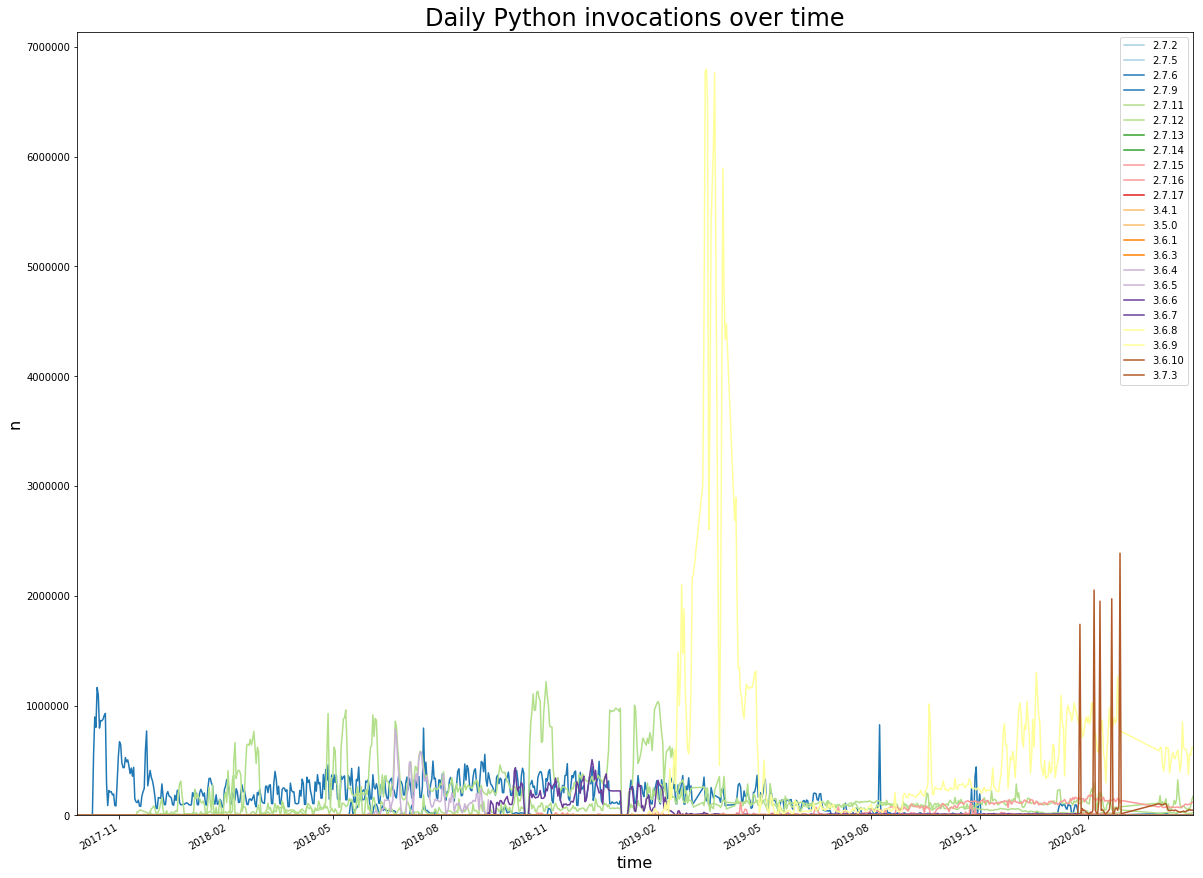

In [11]:
plot_dataframe(daily_usages, log_scale=False, title='Daily Python invocations over time')

<a id="Daily-Python-invocations-over-time---minor-versions---log-scale"></a>

/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/opt/scitools/environments/default/2019_02_27/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


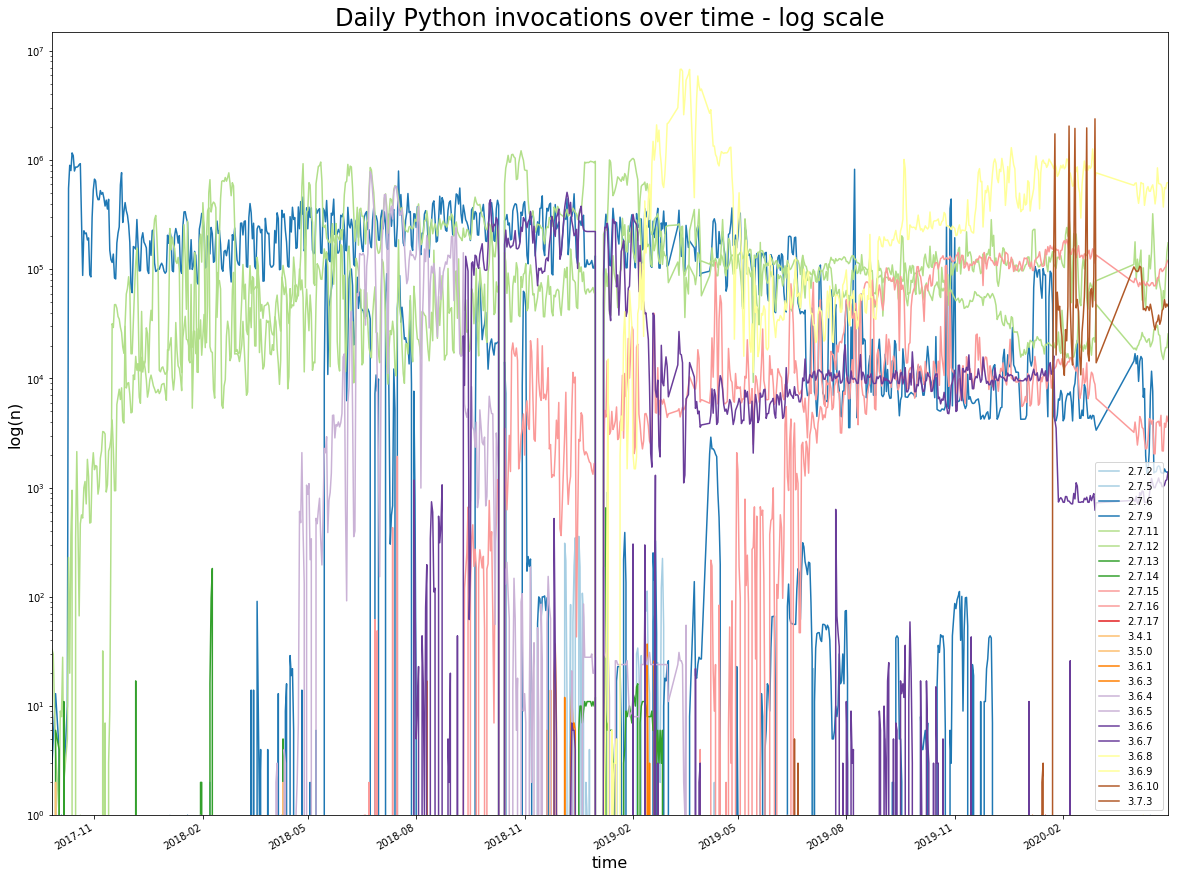

In [12]:
plot_dataframe(daily_usages, log_scale=True, title='Daily Python invocations over time - log scale')

## Major Python versions - 2.x and 3.x

<a id='Daily-Python-invocations-over-time---major-versions'></a>

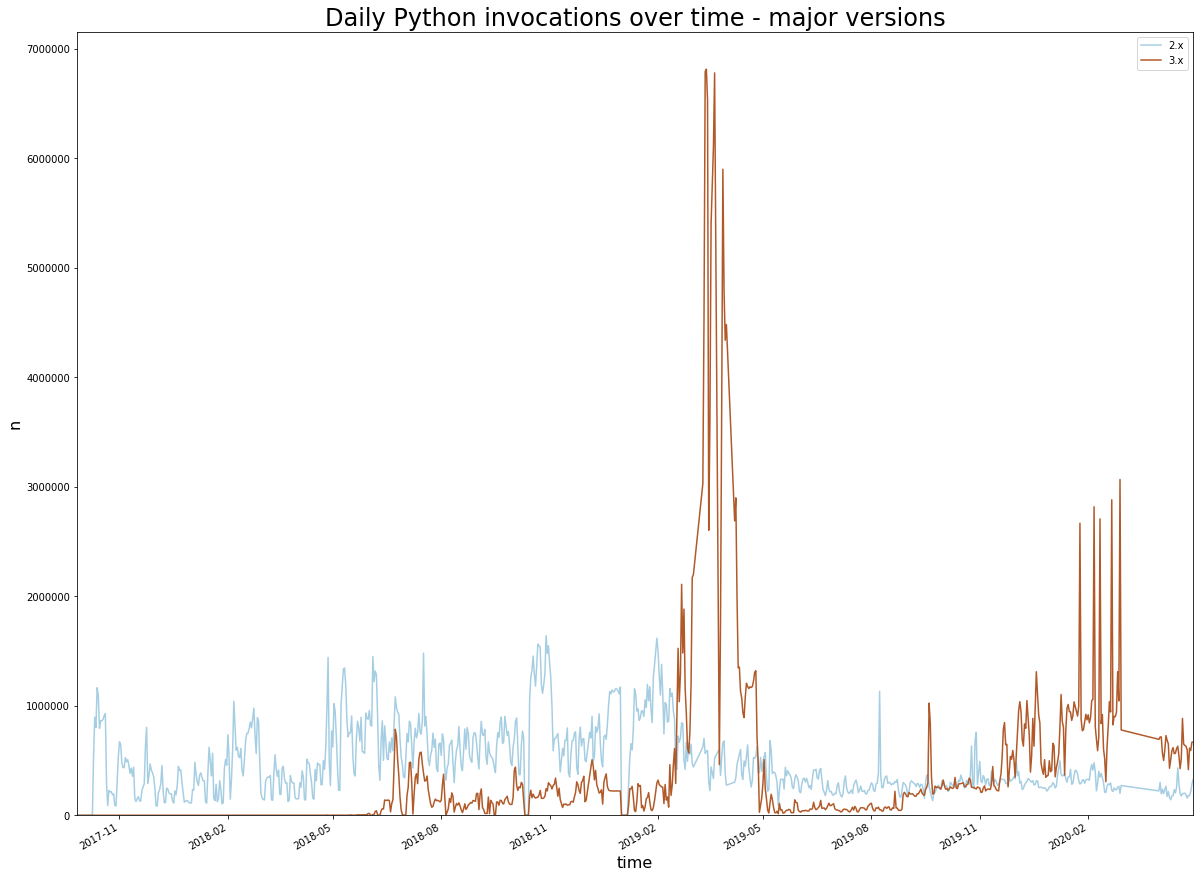

In [13]:
plot_dataframe(daily_usages_major_versions, log_scale=False, title='Daily Python invocations over time - major versions')

<a id='Daily-Python-invocations-over-time---major-versions---log-scale'></a>

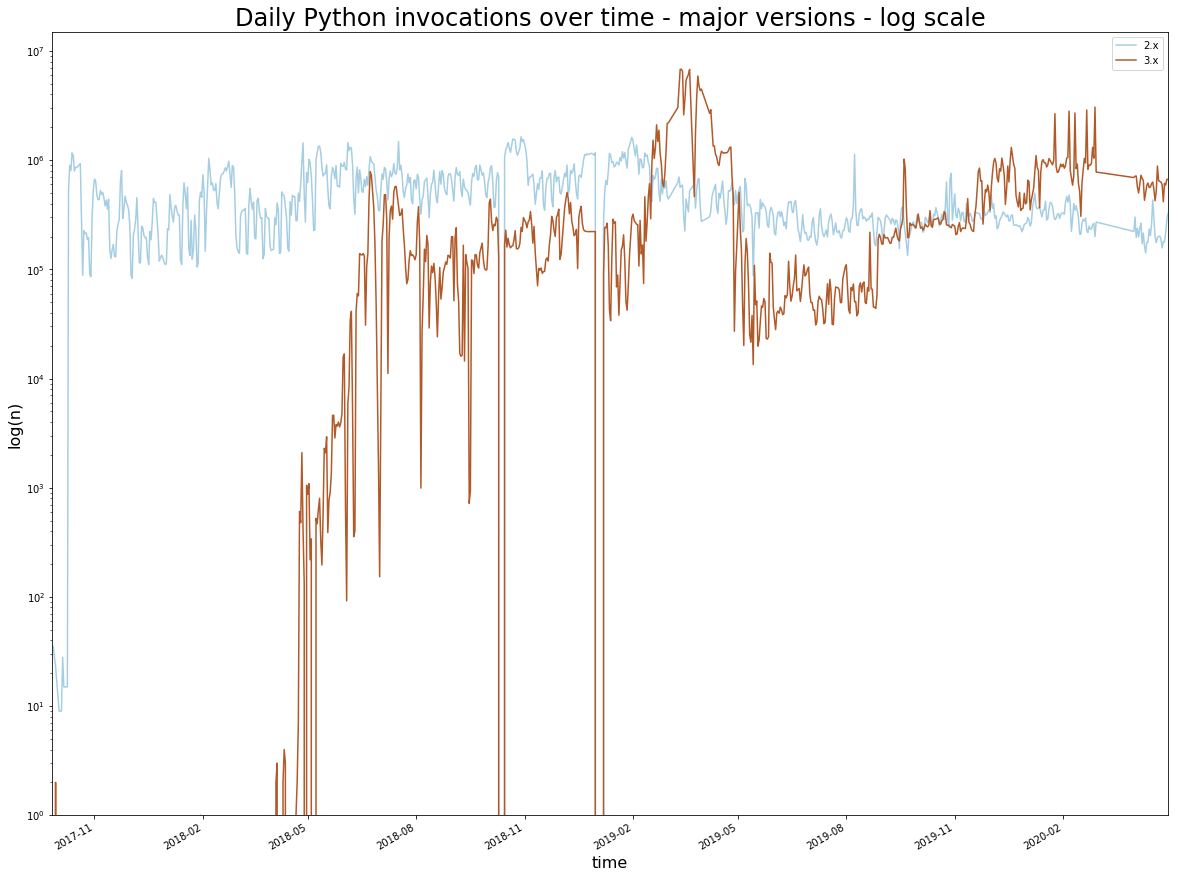

In [14]:
plot_dataframe(daily_usages_major_versions, log_scale=True, title='Daily Python invocations over time - major versions - log scale')

# Who is using Python 2.x and Python 3.x the most?

Presenting post-processed python logging data to show ordered lists of users invoking Python 2.x and Python 3.x

Let's set the time window in question:

In [15]:
last_n_days = 90

### Load data
Let's define a function to get a list of the most recent daily log files. They have the format YYYYMMDD.txt. Ensure they are returned in order oldest to newest:

In [16]:
def get_last_n_days_of_log_files(n):
    wildcarded_filename = '20[12][90][01][0123456789][0123][0123456789].txt'
    list_of_files = glob.glob('/project/avd/python/usage_logs/' + wildcarded_filename) 
    latest_n_files = heapq.nlargest(n, list_of_files, key=os.path.getctime)
    latest_n_files.reverse()
    return latest_n_files

Now call the function get the latest log files:

In [17]:
latest_log_files = get_last_n_days_of_log_files(last_n_days)

Sanity check that they look correct:

In [18]:
latest_log_files

['/project/avd/python/usage_logs/20200224.txt',
 '/project/avd/python/usage_logs/20200225.txt',
 '/project/avd/python/usage_logs/20200226.txt',
 '/project/avd/python/usage_logs/20200227.txt',
 '/project/avd/python/usage_logs/20200301.txt',
 '/project/avd/python/usage_logs/20200302.txt',
 '/project/avd/python/usage_logs/20200303.txt',
 '/project/avd/python/usage_logs/20200304.txt',
 '/project/avd/python/usage_logs/20200305.txt',
 '/project/avd/python/usage_logs/20200306.txt',
 '/project/avd/python/usage_logs/20200307.txt',
 '/project/avd/python/usage_logs/20200308.txt',
 '/project/avd/python/usage_logs/20200211.txt',
 '/project/avd/python/usage_logs/20200229.txt',
 '/project/avd/python/usage_logs/20200207.txt',
 '/project/avd/python/usage_logs/20200206.txt',
 '/project/avd/python/usage_logs/20200228.txt',
 '/project/avd/python/usage_logs/20200309.txt',
 '/project/avd/python/usage_logs/20200310.txt',
 '/project/avd/python/usage_logs/20200312.txt',
 '/project/avd/python/usage_logs/2020031

### Data processing
Let's define a function to take a list of log files and return a Python 2.x dictionary and a Python 3.x dictionary. These dictionaries will contain user aliases as keys, and number of python invocations (over the time period of the log files) as values:

In [19]:
def get_major_version_invocation_counts(latest_log_files):
    dict_2x = {}
    dict_3x = {}
    
    def add_or_incr_dict(the_dict, user):
        if user in the_dict.keys(): 
            the_dict[user] = the_dict[user] + 1
        else: 
            the_dict[user] = 1
        
    for fname in latest_log_files:
        with open(fname) as infile:
            for line in infile:
                if re.search(" startup ", line):
                    words = line.split()
                    user = words[3]
                    py_version = words[5]
                    if py_version[0] == '2':
                        add_or_incr_dict(dict_2x, user)
                    elif py_version[0] == '3':
                        add_or_incr_dict(dict_3x, user)
    return dict_2x, dict_3x

Call the function to get the Python 2.x and Python 3.x dictionaries from the log files:

In [20]:
counts_2x, counts_3x = get_major_version_invocation_counts(latest_log_files)

Define another function. This one takes one of the above (user alias vs count of python invocation) dictionaries and returns an ordered pandas dataframe with heaviest users at the top.

In [21]:
def get_dataframe_from_dict(users_dict):
    # Easiest way to get the dataframe is go via the construction of a list of dictionaries
    df_dicts = []
    
    for user in sorted(users_dict, key=users_dict.get, reverse=True):
        df_dict = {'user':user,'count':str(users_dict[user])}
        df_dicts.append(df_dict)
        
    return pd.DataFrame(df_dicts)

Now we call the above function for the Python 2.x and Python 3.x usage in turn and store resulting dataframes in a dictionary for easy of access later:

In [22]:
df_2x = get_dataframe_from_dict(counts_2x)
df_3x = get_dataframe_from_dict(counts_3x)

dataframes = {'2.x':df_2x, '3.x':df_3x}

### Prepare for displaying results

Define a function which will print from the dataframes above to the notebook. It can be used to print either Python 2.x usage or Python 3.x usage, and either the top N users, or all users. 

We look up user aliases in /etc/aliases in ordered to print out the user/group email as well as their alias and invocation count:

In [33]:
def print_ordered_users_of_major_version(version, top_n=9999): 
    
    # First define a few print formatting parameters
    col_1_width = 3
    col_2_width = 13
    col_3_width = 15
    rule_width = 80
    
    users = dataframes[version].head(top_n)
        
    if (top_n < 9999):
        qualifier = "Top " + str(top_n)
    else:
        qualifier = "All"
    
    print('\n\n' + qualifier + ' users of Python ' + version + ' in the last ' + str(last_n_days) + ' days prior to ' + str(datetime.date.today()))
    print('=' * rule_width)
    print('{:>{width_1}} \t {:>{width_2}} \t {:<{width_3}} \t {}'.format('Idx', 'N.Invocations', 'User', 'Email', \
        width_1 = col_1_width, width_2 = col_2_width, width_3 = col_3_width))
    print('-' * rule_width)
    for index, row in users.iterrows():
        user_alias = row['user']
        alias_grep_term = "'" + user_alias + " :'"
        user_email = !grep $alias_grep_term /etc/aliases | cut -d":" -f2 | sed "s/ //"
        
        # if alias_grep_term isn't present in /etc/aliases we know the relevant email address is just 
        # created by adding '@metoffice.gov.uk' to the username (as advised by Mark Crossland May 2020)
        if not user_email:
            user_email = [user_alias + "@metoffice.gov.uk"]
        
        n_invocations = row['count']
        print('{:>{width_1}} \t {:>{width_2}} \t {:<{width_3}} \t {}'.format(index+1, n_invocations, user_alias, user_email, \
            width_1 = col_1_width, width_2 = col_2_width, width_3 = col_3_width))

## Display Results

### Top users of Python 2.x:
Use our previously defined function to show the top users of Python 2.x over the period in question:

<a id='top-py2-users'></a>

In [34]:
print_ordered_users_of_major_version('2.x', 25)



Top 25 users of Python 2.x in the last 90 days prior to 2020-05-21
Idx 	 N.Invocations 	 User            	 Email
--------------------------------------------------------------------------------
  1 	       2266246 	 satimage        	 ['sat_systems@metoffice.gov.uk']
  2 	       1913389 	 fpos1           	 ['fpos1@metoffice.gov.uk']
  3 	        748364 	 apzl            	 ['zhihong.li@metoffice.gov.uk']
  4 	        739020 	 cshort          	 ['christopher.short@metoffice.gov.uk']
  5 	        677308 	 frdv            	 ['david.rundle@metoffice.gov.uk']
  6 	        659846 	 sgallag         	 ['stephen.gallagher@metoffice.gov.uk']
  7 	        647281 	 hadzc           	 ['claudio.sanchez@metoffice.gov.uk']
  8 	        585195 	 asog            	 ['asog.desktop@metoffice.gov.uk']
  9 	        572153 	 kwever          	 ['kwinten.vanweverberg@metoffice.gov.uk']
 10 	        528115 	 ewarren         	 ['elliott.warren@metoffice.gov.uk']
 11 	        463325 	 fpostest        	 ['fpostest@

### Top users of Python 3.x:
Use our previously defined function to show the top users of Python 3.x over the period in question:

<a id='top-py3-users'></a>

In [35]:
print_ordered_users_of_major_version('3.x', 25)



Top 25 users of Python 3.x in the last 90 days prior to 2020-05-21
Idx 	 N.Invocations 	 User            	 Email
--------------------------------------------------------------------------------
  1 	      27661243 	 ppdev           	 ['ppdev@metoffice.gov.uk']
  2 	      13273369 	 fra27           	 ['robert.neal@metoffice.gov.uk']
  3 	      10643419 	 root            	 ['linuxteam@metoffice.gov.uk']
  4 	       4961449 	 olewis          	 ['owen.lewis@metoffice.gov.uk']
  5 	       1478992 	 fpos1           	 ['fpos1@metoffice.gov.uk']
  6 	       1091982 	 gltrials        	 ['gltrials@metoffice.gov.uk']
  7 	       1084067 	 entrials        	 ['entrials.desktop@metoffice.gov.uk']
  8 	        863463 	 seafc           	 ['jamie.kettleborough@metoffice.gov.uk, philip.davis@metoffice.gov.uk, andrew.clark@metoffice.gov.uk']
  9 	        736222 	 nxwaite         	 ['neil.crosswaite@metoffice.gov.uk']
 10 	        695060 	 name            	 ['atmospheric.dispersion@metoffice.gov.uk', 'a

### ALL users of Python 2.x:
Use our previously defined function to show ALL users of Python 2.x over the period in question (ordered by usage):

<a id='all-py2-users'></a>

In [36]:
print_ordered_users_of_major_version('2.x')



All users of Python 2.x in the last 90 days prior to 2020-05-21
Idx 	 N.Invocations 	 User            	 Email
--------------------------------------------------------------------------------
  1 	       2266246 	 satimage        	 ['sat_systems@metoffice.gov.uk']
  2 	       1913389 	 fpos1           	 ['fpos1@metoffice.gov.uk']
  3 	        748364 	 apzl            	 ['zhihong.li@metoffice.gov.uk']
  4 	        739020 	 cshort          	 ['christopher.short@metoffice.gov.uk']
  5 	        677308 	 frdv            	 ['david.rundle@metoffice.gov.uk']
  6 	        659846 	 sgallag         	 ['stephen.gallagher@metoffice.gov.uk']
  7 	        647281 	 hadzc           	 ['claudio.sanchez@metoffice.gov.uk']
  8 	        585195 	 asog            	 ['asog.desktop@metoffice.gov.uk']
  9 	        572153 	 kwever          	 ['kwinten.vanweverberg@metoffice.gov.uk']
 10 	        528115 	 ewarren         	 ['elliott.warren@metoffice.gov.uk']
 11 	        463325 	 fpostest        	 ['fpostest@met

### ALL users of Python 3.x:
Use our previously defined function to show ALL users of Python 3.x over the period in question (ordered by usage):

<a id='all-py3-users'></a>

In [37]:
print_ordered_users_of_major_version('3.x')



All users of Python 3.x in the last 90 days prior to 2020-05-21
Idx 	 N.Invocations 	 User            	 Email
--------------------------------------------------------------------------------
  1 	      27661243 	 ppdev           	 ['ppdev@metoffice.gov.uk']
  2 	      13273369 	 fra27           	 ['robert.neal@metoffice.gov.uk']
  3 	      10643419 	 root            	 ['linuxteam@metoffice.gov.uk']
  4 	       4961449 	 olewis          	 ['owen.lewis@metoffice.gov.uk']
  5 	       1478992 	 fpos1           	 ['fpos1@metoffice.gov.uk']
  6 	       1091982 	 gltrials        	 ['gltrials@metoffice.gov.uk']
  7 	       1084067 	 entrials        	 ['entrials.desktop@metoffice.gov.uk']
  8 	        863463 	 seafc           	 ['jamie.kettleborough@metoffice.gov.uk, philip.davis@metoffice.gov.uk, andrew.clark@metoffice.gov.uk']
  9 	        736222 	 nxwaite         	 ['neil.crosswaite@metoffice.gov.uk']
 10 	        695060 	 name            	 ['atmospheric.dispersion@metoffice.gov.uk', 'atmo